# Challenge 1

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [ ]:
hola

In [14]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [44]:
fitbit = pd.read_csv('data/Fitbit2.csv')
fitbit.head()
fitbit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**

Hints:
- Use `Months_encoded` column
- Use `pd` method `.groupby` to obtain your plottable data
- Use `pd` method `.plot`

In [8]:
fitbit.Months_encoded.value_counts()

12    31
10    31
8     31
7     31
5     31
3     31
1     31
11    30
9     30
6     30
4     30
2     30
Name: Months_encoded, dtype: int64

<AxesSubplot:title={'center':'Median Steps by Month Encoded'}, xlabel='Months_encoded', ylabel='Median steps by month'>

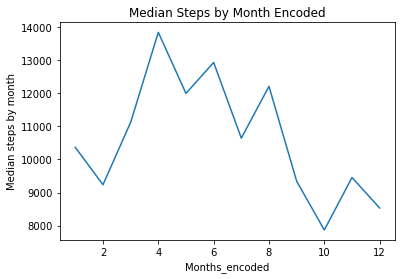

In [24]:
steps_by_month = fitbit.groupby('Months_encoded').Steps.median()
steps_by_month
steps_by_month.plot(ylabel = 'Median steps by month', title = 'Median Steps by Month Encoded')

In [25]:
steps_by_month

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

2. **How the sleeping efficiency distributes. Use the appropriate visualization to show the median steps by month?**

Excluding days when `Yesterday_sleep` is 0, we would like to understand:
 - How the sleeping efficiency distributes. Plot a distribution, plus a vertical line with the mean.
 - How the sleeping efficiency distributes on Weekdays vs Workdays. Plot both distributions toguether.

Hints:
- Use `Yesterday_sleep_efficiency` column, among others.
- Use `sns` function `.hist` to plot your continuous data.
- Use `plt` function `.axvline` to plot the mean.
- Use `hue` parameter to distinguish between Workday and Weekend.
- Save your figures.

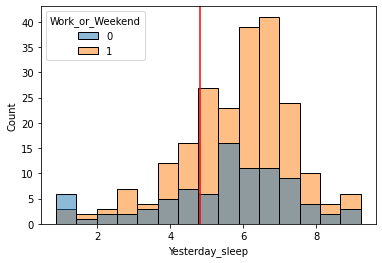

In [42]:
# Driver 1 enter codes here
Yesterday_sleep = fitbit[fitbit['Yesterday_sleep'] > 0]

sleep_dist = sns.histplot(x = 'Yesterday_sleep', data= Yesterday_sleep, hue = 'Work_or_Weekend', alpha = .5)
sleep_dist.axvline(x=fitbit.Yesterday_sleep.mean(), c='red', label='mean')


In [38]:
sleep_dist.axvline(x=fitbit.Yesterday_sleep.mean(), c='red', label='mean')

## Coding Session II - 30 minutes

**Draw 4 scatter plots (2 rows and 2 columns) of the following features. Include some interesting legend and some interesting text**.

 - `Minutes Lightly Active`  vs `Steps`
 - `Minutes Very Active` vs `Steps`
 - `Minutes Sedentary` vs `Steps`
 - `Minutes Sedentary` vs `Minutes Very Active`
 
Hints:
 - Use `plt.subplots`
 - Use `ax.annotate`
 - Use `ax.legend` and `label` parameter

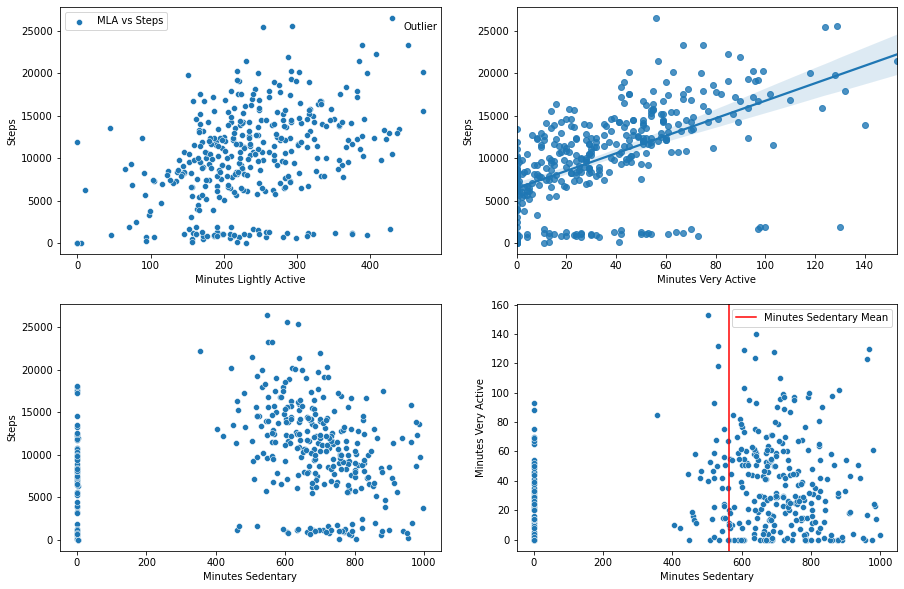

In [45]:
# Driver 2 enter codes here
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x="Minutes Lightly Active", y="Steps", label="MLA vs Steps", ax= axs[0,0], data=fitbit)
sns.regplot(x="Minutes Very Active", y="Steps", ax=axs[0,1], data=fitbit)
sns.scatterplot(x="Minutes Sedentary", y="Steps", ax=axs[1,0], data=fitbit)
sns.scatterplot(x="Minutes Sedentary", y="Minutes Very Active", ax=axs[1,1], data=fitbit)
axs[0,0].annotate("Outlier", xy=(445,25090))
axs[1,1].axvline(fitbit["Minutes Sedentary"].mean(), c="r", label="Minutes Sedentary Mean")
axs[1,1].legend()